In [2]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 2.7MB/s 
     |████████████████████████████████| 8.7MB 15.1MB/s 
     |████████████████████████████████| 2.1MB 52.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [4]:
from google.colab import files
files.upload()

Saving Test_dataset.xlsx to Test_dataset.xlsx
Saving Train_dataset.xlsx to Train_dataset.xlsx


{'Test_dataset.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00!\x8cF:s\x01\x00\x00\x8c\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [5]:
train = pd.read_excel('Train_dataset.xlsx')
test = pd.read_excel('Test_dataset.xlsx')

In [6]:
train.head(5)

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [7]:
train =train.drop(["State","Type","SWM",],1).groupby('City').sum()
test =test.drop(["State","Type","SWM"],1).groupby('City').sum()

In [8]:
train.head()

,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
City,,,,,,,,,,,,
Adoni,166537.0,0.0,896.0,26.0,40.0,0.0,0.0,0.345381,149217.0,88.0,237854.0,9309
Agartala,399688.0,271811.0,977.0,28.0,12.0,122.0,122.0,0.121407,390495.0,64.0,34886.0,10933
Agra,1585704.0,1275134.0,875.0,25.0,34.0,124.0,115.0,0.152534,1387491.0,99.0,3104060.0,3834
Ahmedabad,5570585.0,3520085.0,852.0,29.0,25.0,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204
Ahmednagar,350905.0,307615.0,893.0,27.0,30.0,150.0,166.0,0.214027,313358.0,80.0,4408916.0,26912


In [9]:
test.head()

,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
City,,,,,,,,,,,
Achhnera,22781.0,0.0,867.0,23.0,34.0,68.0,170.0,0.668778,19751.0,24.0,3104060.0
Adalaj,11957.0,0.0,867.0,26.0,30.0,64.0,157.0,0.508475,10367.0,11.0,284973.0
Adoor,29171.0,0.0,981.0,30.0,32.0,83.0,189.0,0.044800,28617.0,15.0,977479.0
Adra,14956.0,0.0,948.0,24.0,31.0,84.0,151.0,0.991307,14178.0,28.0,1489500.0
Adyar,7034.0,0.0,928.0,29.0,29.0,0.0,0.0,0.000000,0.0,0.0,0.0


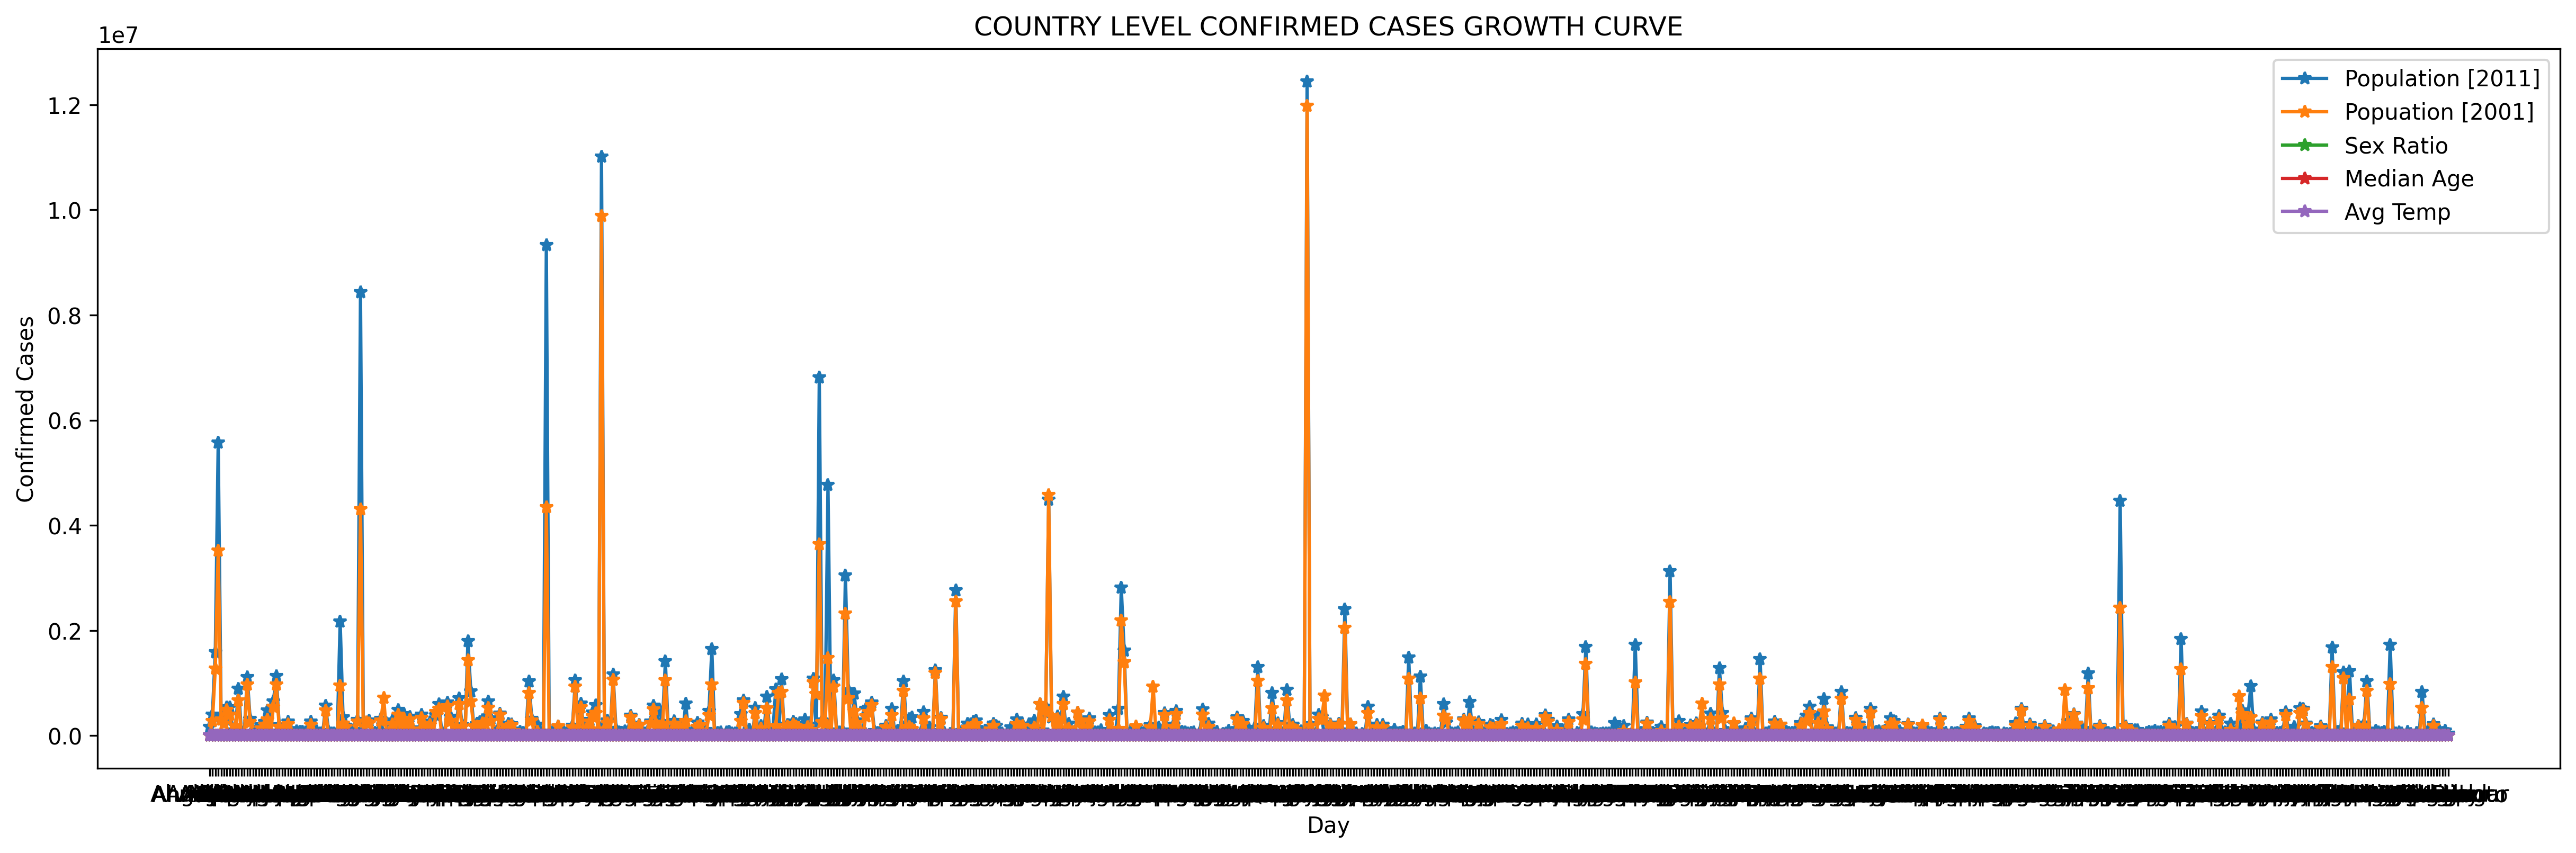

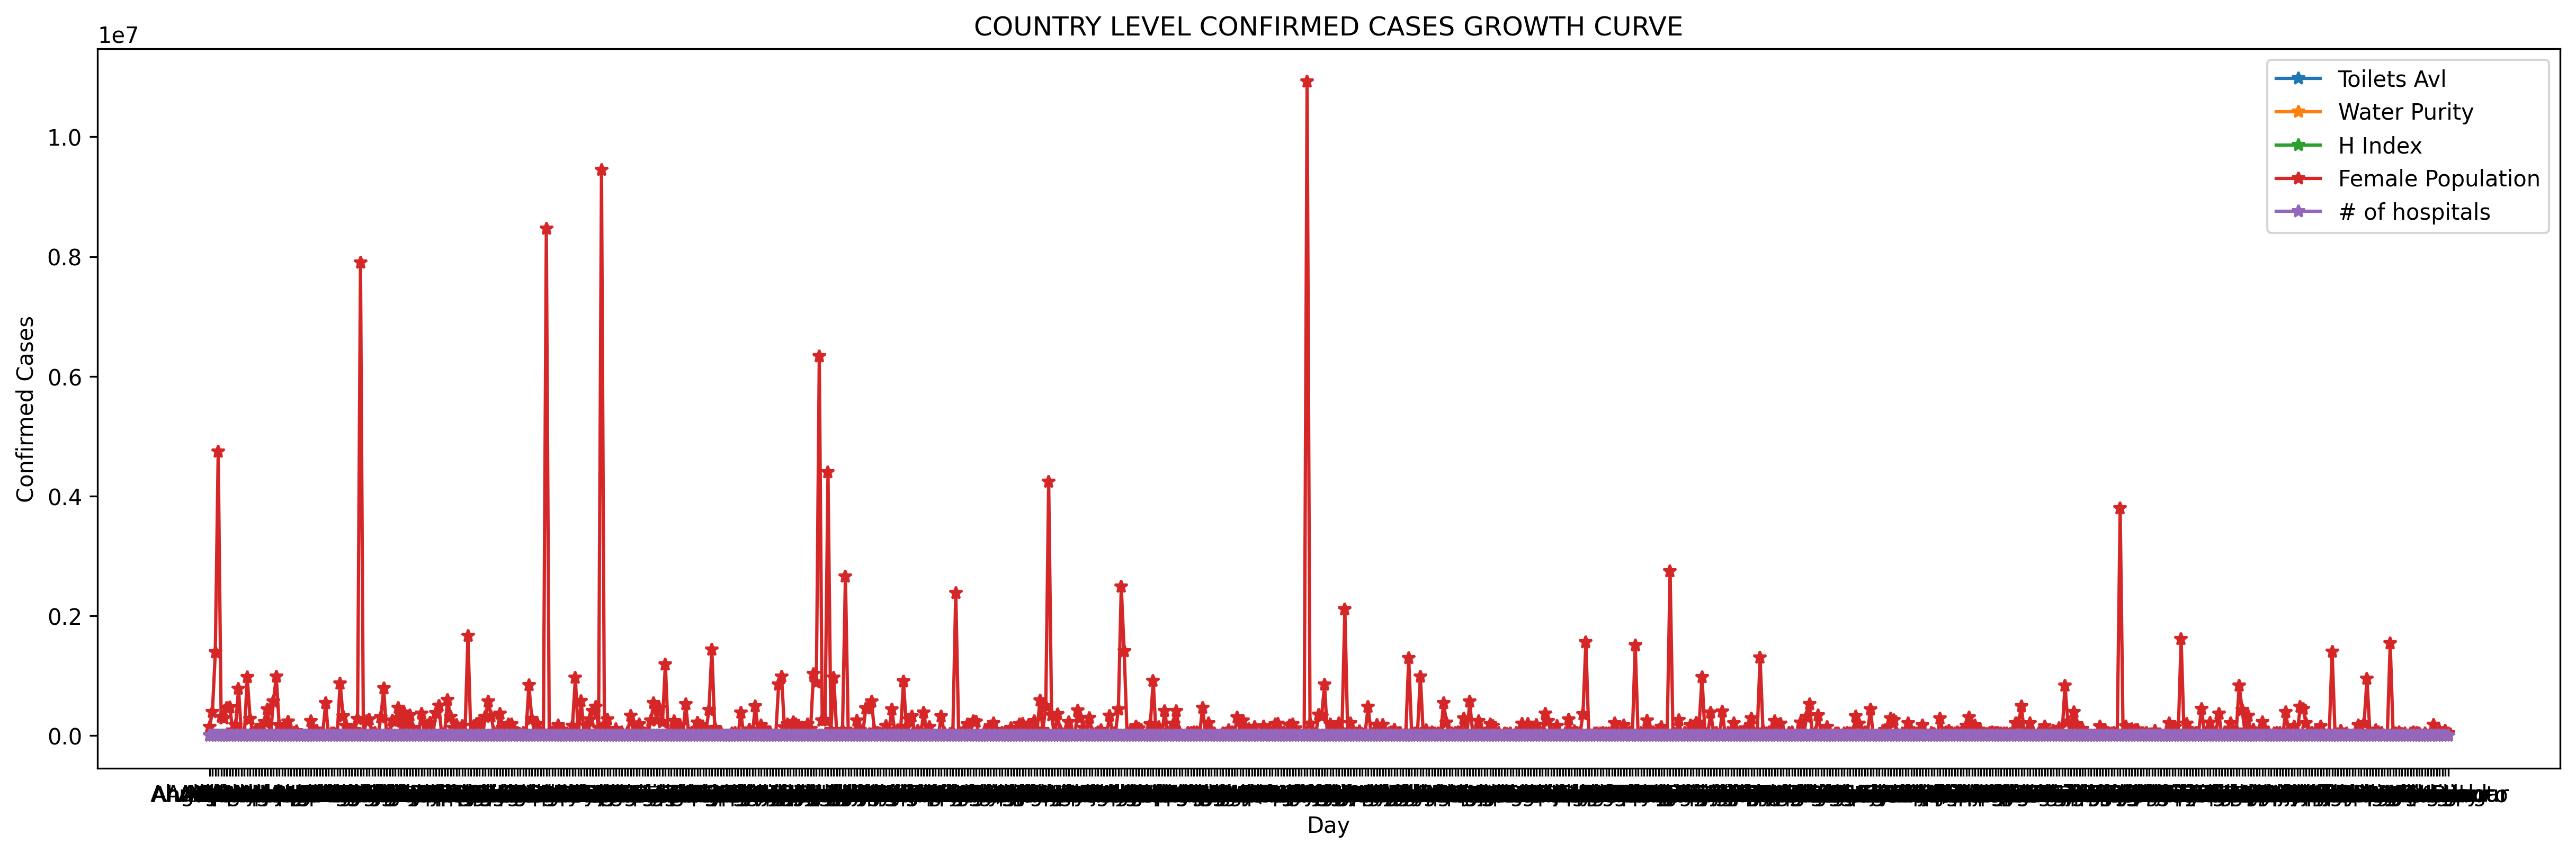

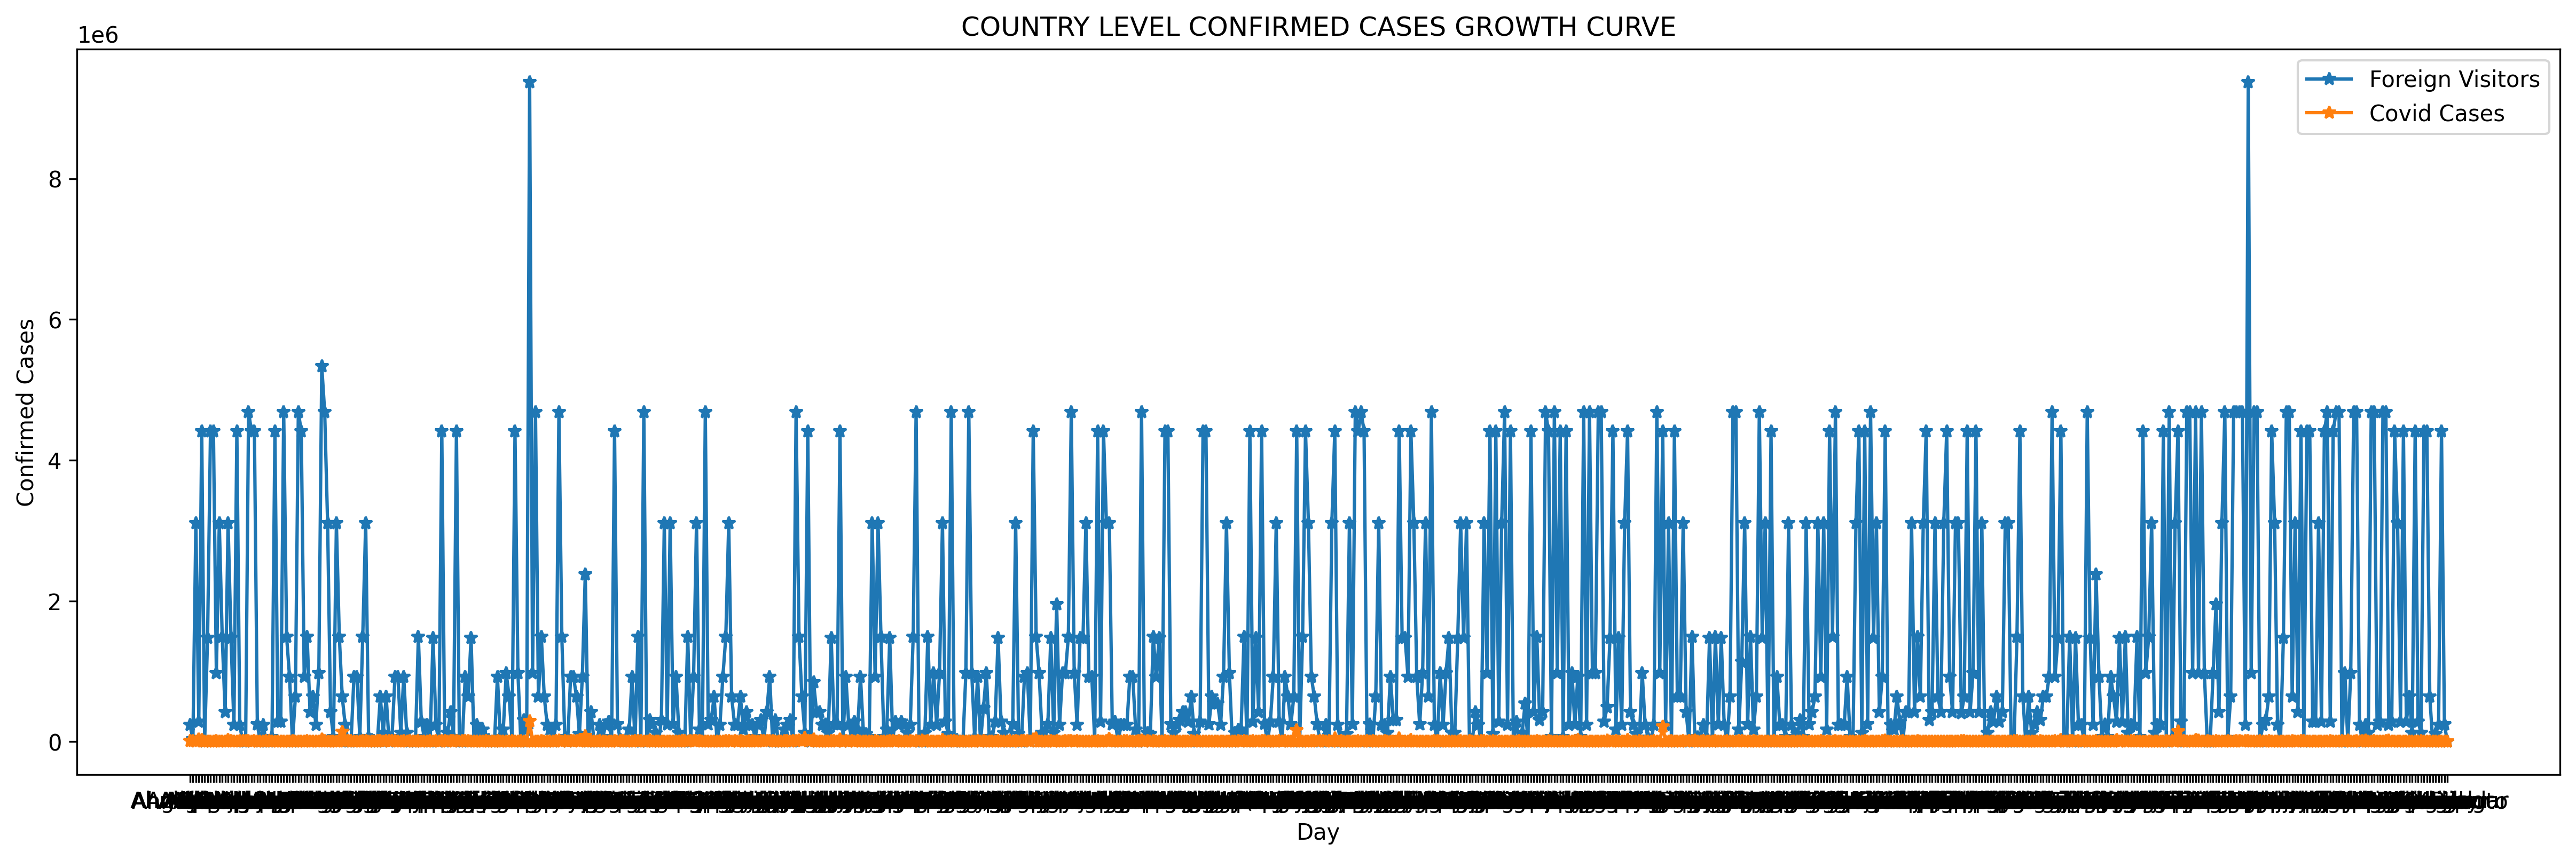

No handles with labels found to put in legend.


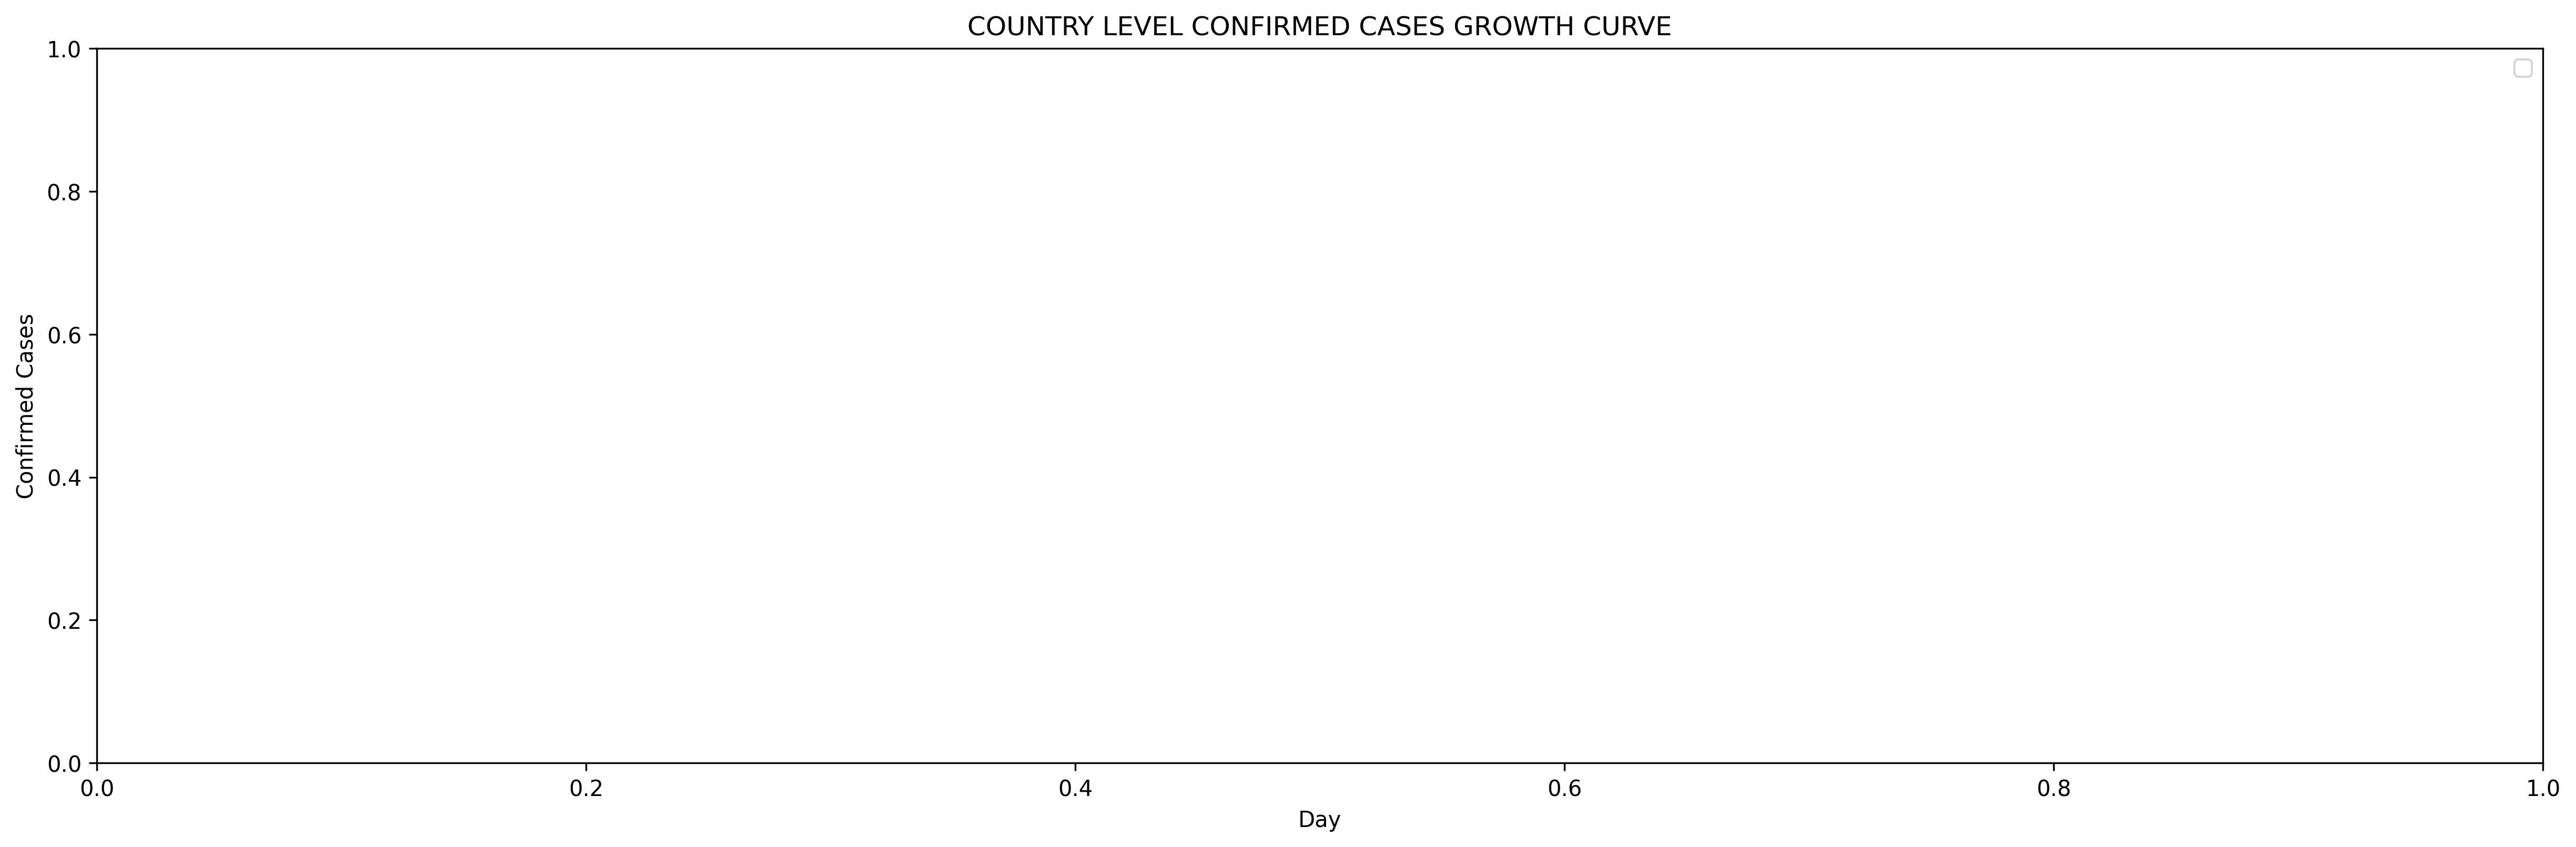

In [13]:
for j in range(1,5):   
    plt.figure(figsize=(20,6))
    for tt in train.columns[(j-1)*5:j*5]:
        data = train[[tt]]
        data = train[data[tt]> 0].reset_index(drop=True)
        data = train.rolling(2).mean().fillna(0)
        plt.plot([str(i) for i in train[tt].index],train[tt],marker='*',label=tt)
        
    plt.title("COUNTRY LEVEL CONFIRMED CASES GROWTH CURVE")
    plt.legend()
    plt.xlabel('Day')
    plt.ylabel('Confirmed Cases')
    plt.show()